# K- Nearest Neighbors

## MSc Rubén Quispe

En este laboratorio vamos a conocer KNN, vamos a cargar y ajustar nuestros dataset, Utilizando K-Vecinos mas cercanos
¿Qué es KNN?
es un algoritmo de aprendizaje supervisado, donde los datos estan orientados con puntos de datos correspondientes a su clasificación, una vez que se predeci un punto, tenemos que tener en cuenta los k puntos mas cercanos para determinar su clasificiación

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

En este caso, tenemos puntos de datos de Clase A y B. Queremos predecir qué es la estrella (punto de datos de prueba). Si consideramos un valor k de 3 (3 puntos de datos más cercanos) obtendremos una predicción de la Clase B. Sin embargo, si consideramos un valor k de 6, obtendremos una predicción de la Clase A.

En este sentido, es importante considerar el valor de k. Pero, con suerte, a partir de este diagrama, debe tener una idea de lo que es el algoritmo de K-NN. Considera los vecinos más cercanos (puntos) 'K' cuando predice la clasificación del punto de prueba

# TABLA DE CONTENIDOS

1.  Sobre dataset
2. Visualización y Analisis de datos
3. Clasificación

In [1]:
# Importando nuestras librerias
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

**Sobre el conjunto de datos**
Imagine que un proveedor de telecomunicaciones ha segmentado su base datos  de clientes por patrones de uso del servicio, categorizando a los clientes en cuatro grupos. Si los datos demográficos se pueden utilizar para predecir la pertenencia al grupo, la empresa puede personalizar las ofertas para clientes potenciales individuales. Es un problema de clasificación. Es decir, dado el conjunto de datos, con etiquetas predefinidas, necesitamos construir un modelo que se use para predecir la clase de un caso nuevo o desconocido.

El ejemplo se centra en el uso de datos demográficos, como la región, la edad y el matrimonio, para predecir patrones de uso.

El campo del objetivo, llamado **custcat**, tiene cuatro valores posibles que corresponden a los cuatro grupos de clientes, de la siguiente manera: 
1. Servicio básico 
2. Servicio electrónico
3. Servicio Plus 
4. Servicio total

Nuestro objetivo es construir un clasificador, para predecir la clase de casos desconocidos. Usaremos un tipo específico de clasificación llamado K vecino más cercano.

Vamos a descargar el conjunto de datos. Para descargar los datos, utilizaremos! Wget.

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-06-05 13:50:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... ......               100%  336K=0.1s

2020-06-05 13:50:13 (336 KB/s) - 'teleCust1000t.csv' saved [37048/37048]



# Cargar nuestros datos desde CSV

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# Analisis y visualización de datos
#Veamos cuántos de cada clase hay en nuestro conjunto de datos.
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Servicio Plus 281, servicio básico 266,  servicio total 236 y clientes de servicio electrónico 217

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4FE5B3C08>]],
      dtype=object)

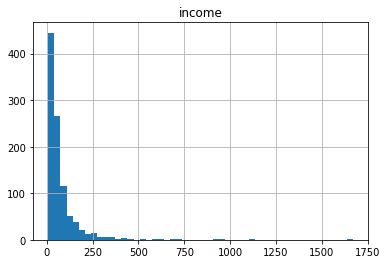

In [5]:
# vamos a explorar nuestros datos facilmente utilizando la tecnica de visualización 
df.hist(column = 'income', bins = 50)

In [6]:
# vamos a definir conjunto de caraterísticas
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
#Para usar la biblioteca scikit-learn, tenemos que convertir el marco de datos o (dataframe) de Pandas a una matriz de Numpy
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
#.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
# cuales son nuestras etiquetas?
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# normalizar datos
La estandarización de datos proporciona a los datos media cero y varianza unitaria, es una buena práctica, especialmente para algoritmos como KNN que se basa en la distancia de los casos:

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# División de datos de Train y test
La precisión fuera de la muestra es el porcentaje de predicciones correctas que el modelo hace sobre los datos en los que el modelo NO ha sido entrenado. Hacer un entreamiento y probar en el mismo conjunto de datos probablemente tendrá una baja precisión fuera de la muestra, debido a la probabilidad de un sobreajuste o overffiting.

Es importante que nuestros modelos tengan una alta precisión fuera de la muestra, porque el propósito de cualquier modelo, por supuesto, es hacer predicciones correctas sobre datos desconocidos. Entonces, ¿cómo podemos mejorar la precisión fuera de la muestra? Una forma es utilizar un enfoque de evaluación llamado Train / Test Split. La división de entrenamiento / prueba implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba, respectivamente, que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba con el conjunto de prueba.

Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no es parte del conjunto de datos que se ha utilizado para entrenar los datos. Es más realista para problemas del mundo real.


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Clasificación con K-Nearest Neighbors 

In [12]:
# Clasificación con KNN
from sklearn.neighbors import KNeighborsClassifier

## comencemos el algoritmos con k = 4 ahora:

In [13]:
# Training
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

# Predicción 
Podemos usar el modelo para predecir el conjunto de pruebas

In [14]:
# Predición
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

# Evaluación de Precisión

En la clasificación de múltiples etiquetas, la puntuación (Score) de clasificación de precisión(accuracy) es una función que calcula la precisión del subconjunto. Esta función es igual a la función jaccard_similarity_score. Esencialmente, calcula cuán estrechamente coinciden las etiquetas reales y las predichas en el conjunto de prueba.

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


# Práctica tarea para la próxima semana
¿Puedes construir el modelo nuevamente, pero esta vez con k = 6?

In [20]:
# Escribe tu codigo aqui
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


##  ¿Qué hay de otras K?
K en KNN, es el número de vecinos más cercanos a examinar. Se supone que debe ser especificado por el usuario. Entonces, ¿cómo podemos elegir el valor correcto para K? La solución general es reservar una parte de sus datos para probar la precisión del modelo. Luego elija k = 1, use la parte de entrenamiento para modelar y calcule la precisión de la predicción usando todas las muestras en su conjunto de prueba. Repita este proceso, aumentando la k, y vea qué k es la mejor para su modelo.

Podemos calcular la precisión de KNN para diferentes Ks.

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Trazar la precisión del modelo para diferentes números de vecinos

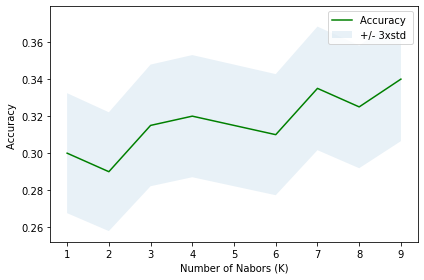

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# Gracias